<a href="https://colab.research.google.com/github/signife/VentureStartUp/blob/main/src/DataMining/05_01_Prophet_StockMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data



In [18]:
# https://finance.yahoo.com/quote/TSLL?.tsrc=fin-srch
yf.pdr_override()

start_date = '2020-01-01'
end_date = '2024-04-30'

tsll = data.get_data_yahoo('TSLL',start_date, end_date)
tsll

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-09,25.230000,25.230000,23.670000,24.129999,22.674694,144000
2022-08-10,25.870001,25.900000,24.150000,25.450001,23.915085,472800
2022-08-11,25.750000,25.959999,24.360001,24.520000,23.041178,576000
2022-08-12,24.809999,26.170000,24.260000,26.129999,24.554073,490200
2022-08-15,26.450001,27.879999,26.350000,27.350000,25.700493,1058100
...,...,...,...,...,...,...
2024-04-23,5.280000,5.565000,5.121000,5.390000,5.390000,31842300
2024-04-24,6.735000,7.110000,6.330000,6.660000,6.660000,48473700
2024-04-25,6.400000,7.375000,6.350000,7.340000,7.340000,32858700


In [19]:
df = pd.DataFrame({'ds':tsll.index, 'y':tsll['Close']})
df

,ds,y
Date,,
2022-08-09,2022-08-09,24.129999
2022-08-10,2022-08-10,25.450001
2022-08-11,2022-08-11,24.520000
2022-08-12,2022-08-12,26.129999
2022-08-15,2022-08-15,27.350000
...,...,...
2024-04-23,2024-04-23,5.390000
2024-04-24,2024-04-24,6.660000
2024-04-25,2024-04-25,7.340000


In [20]:
df.reset_index(inplace = True)
df

,Date,ds,y
0,2022-08-09,2022-08-09,24.129999
1,2022-08-10,2022-08-10,25.450001
2,2022-08-11,2022-08-11,24.520000
3,2022-08-12,2022-08-12,26.129999
4,2022-08-15,2022-08-15,27.350000
...,...,...,...
428,2024-04-23,2024-04-23,5.390000
429,2024-04-24,2024-04-24,6.660000
430,2024-04-25,2024-04-25,7.340000
431,2024-04-26,2024-04-26,7.150000


In [21]:
del df['Date']
df

,ds,y
0,2022-08-09,24.129999
1,2022-08-10,25.450001
2,2022-08-11,24.520000
3,2022-08-12,26.129999
4,2022-08-15,27.350000
...,...,...
428,2024-04-23,5.390000
429,2024-04-24,6.660000
430,2024-04-25,7.340000
431,2024-04-26,7.150000


In [12]:
!pip install statsmodels==0.11.1
!pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 18.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [22]:
from prophet import Prophet


In [23]:
model = Prophet(yearly_seasonality=True, daily_seasonality=True)
model.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5p4hhkmb/jyhi7xrl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5p4hhkmb/panfpsx0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10712', 'data', 'file=/tmp/tmp5p4hhkmb/jyhi7xrl.json', 'init=/tmp/tmp5p4hhkmb/panfpsx0.json', 'output', 'file=/tmp/tmp5p4hhkmb/prophet_modelb2h1mo__/prophet_model-20240501023534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:35:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:35:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
future_result = model.make_future_dataframe(periods= 365)
result = model.predict(future_result)

In [25]:
result

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-08-09,24.205079,24.948323,28.361954,24.205079,24.205079,2.550178,2.550178,2.550178,0.850577,...,0.078200,0.078200,0.078200,1.621400,1.621400,1.621400,0.0,0.0,0.0,26.755256
1,2022-08-10,24.096936,24.920945,28.074869,24.096936,24.096936,2.393332,2.393332,2.393332,0.850577,...,0.078242,0.078242,0.078242,1.464513,1.464513,1.464513,0.0,0.0,0.0,26.490268
2,2022-08-11,23.988793,24.531358,27.732175,23.988793,23.988793,2.145797,2.145797,2.145797,0.850577,...,-0.025106,-0.025106,-0.025106,1.320326,1.320326,1.320326,0.0,0.0,0.0,26.134590
3,2022-08-12,23.880650,24.193963,27.502182,23.880650,23.880650,1.999757,1.999757,1.999757,0.850577,...,-0.040650,-0.040650,-0.040650,1.189830,1.189830,1.189830,0.0,0.0,0.0,25.880407
4,2022-08-15,23.556221,23.820855,27.099957,23.556221,23.556221,1.860997,1.860997,1.860997,0.850577,...,0.121959,0.121959,0.121959,0.888460,0.888460,0.888460,0.0,0.0,0.0,25.417218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,2025-04-25,-15.916157,-28.167325,-6.614921,-26.165019,-4.935322,-1.453965,-1.453965,-1.453965,0.850577,...,-0.040650,-0.040650,-0.040650,-2.263892,-2.263892,-2.263892,0.0,0.0,0.0,-17.370122
794,2025-04-26,-15.977462,-28.009180,-6.224866,-26.219543,-4.976374,-1.593791,-1.593791,-1.593791,0.850577,...,-0.106322,-0.106322,-0.106322,-2.338047,-2.338047,-2.338047,0.0,0.0,0.0,-17.571254
795,2025-04-27,-16.038767,-28.073025,-6.693039,-26.274067,-5.049436,-1.667996,-1.667996,-1.667996,0.850577,...,-0.106322,-0.106322,-0.106322,-2.412251,-2.412251,-2.412251,0.0,0.0,0.0,-17.706763
796,2025-04-28,-16.100073,-27.990568,-6.830945,-26.355214,-5.075849,-1.514063,-1.514063,-1.514063,0.850577,...,0.121959,0.121959,0.121959,-2.486600,-2.486600,-2.486600,0.0,0.0,0.0,-17.614136


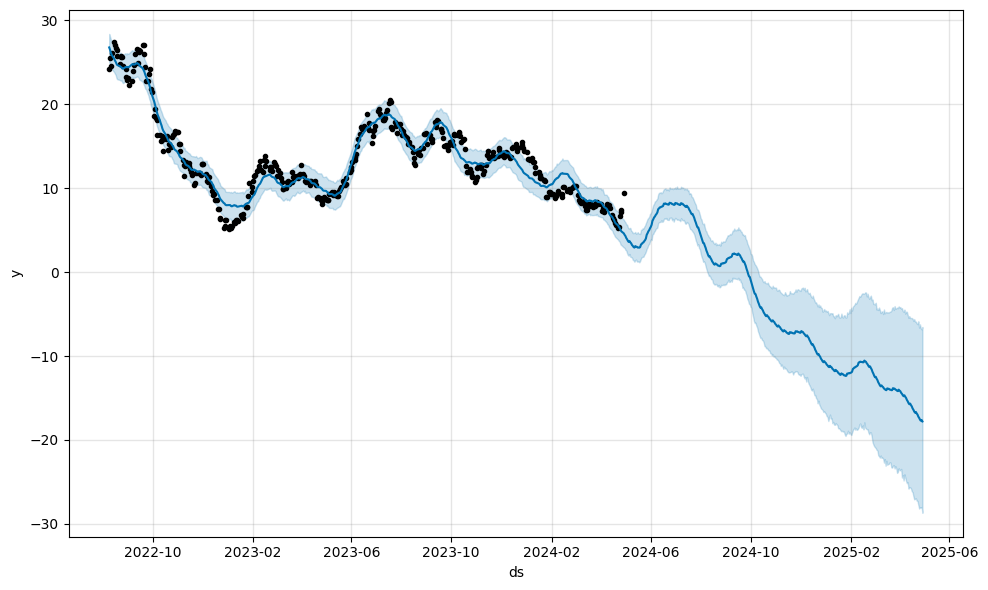

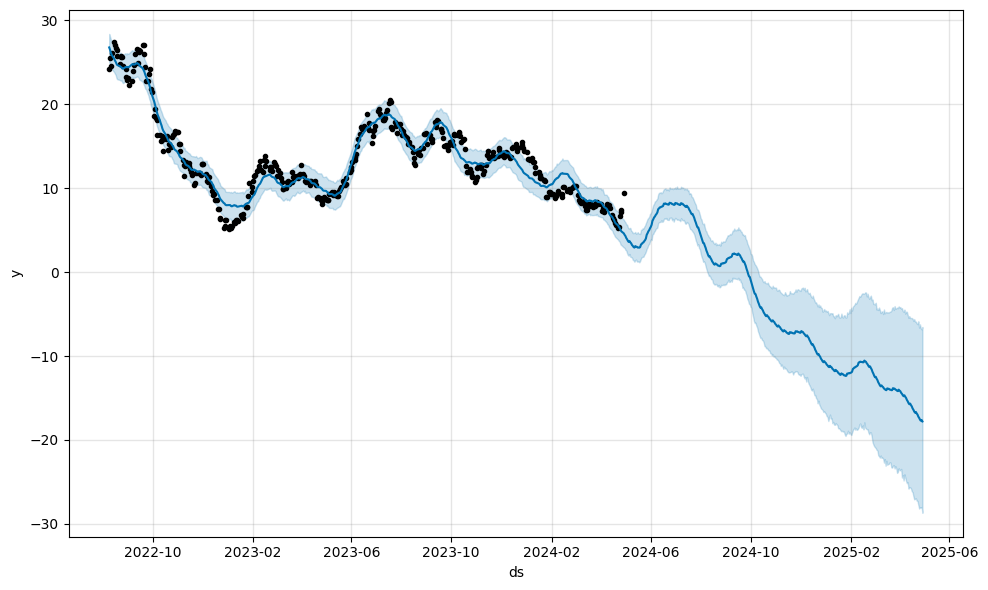

In [26]:
model.plot(result)

In [1]:
model.plot_components(result)

NameError: name 'model' is not defined